# Ngram, BOW

## Ngram

입력된 텍스트로부터 Ngram 생성

In [31]:
import nltk
import sklearn
from nltk import ngrams
sentence = 'this is a foo bar sentences and i want to ngramize it'
n = 3 # you can give 4, 5, 1 or any number less than sentences length
ngramsres = ngrams(sentence.split(), n)
for grams in ngramsres:
    print (grams)

('this', 'is', 'a')
('is', 'a', 'foo')
('a', 'foo', 'bar')
('foo', 'bar', 'sentences')
('bar', 'sentences', 'and')
('sentences', 'and', 'i')
('and', 'i', 'want')
('i', 'want', 'to')
('want', 'to', 'ngramize')
('to', 'ngramize', 'it')


가장 많이 출현한 바이그램 출력하기

In [25]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = BigramCollocationFinder.from_words(
    nltk.corpus.genesis.words('english-web.txt'))
finder.nbest(bigram_measures.pmi, 10)

[('Allon', 'Bacuth'),
 ('Ashteroth', 'Karnaim'),
 ('Ben', 'Ammi'),
 ('En', 'Mishpat'),
 ('Jegar', 'Sahadutha'),
 ('Salt', 'Sea'),
 ('Whoever', 'sheds'),
 ('appoint', 'overseers'),
 ('aromatic', 'resin'),
 ('cutting', 'instrument')]

입력된 텍스트로부터 바이그램 생성

In [24]:
from nltk import bigrams
text = "I do not like green eggs and ham, I do not like them Sam I am!"
tokens = nltk.wordpunct_tokenize(text)
finder = BigramCollocationFinder.from_words(tokens)
scored = finder.score_ngrams(bigram_measures.raw_freq)
sorted(bigram for bigram, score in scored)

[(',', 'I'),
 ('I', 'am'),
 ('I', 'do'),
 ('Sam', 'I'),
 ('am', '!'),
 ('and', 'ham'),
 ('do', 'not'),
 ('eggs', 'and'),
 ('green', 'eggs'),
 ('ham', ','),
 ('like', 'green'),
 ('like', 'them'),
 ('not', 'like'),
 ('them', 'Sam')]

바이그램의 빈도수 세기

In [32]:
sorted(finder.nbest(trigram_measures.raw_freq, 2))
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:10]

[((',', 'and'), 1271),
 ((',', '"'), 510),
 (('of', 'the'), 369),
 (("'", 's'), 300),
 (('in', 'the'), 270),
 (('said', ','), 258),
 (('said', 'to'), 197),
 (('.', 'He'), 174),
 (('the', 'land'), 161),
 (('.', 'The'), 153)]

## BOW(Bag of Words, 단어가방)

#### Scikit-learn의 CounterVectorizer 활용하기

`CountVectorizer`는 다음과 같은 세가지 작업을 수행한다.

1. 문서를 토큰 리스트로 변환한다.
2. 각 문서에서 토큰의 출현 빈도를 센다.
3. 각 문서를 BOW 인코딩 벡터로 변환한다. 

텍스트를 입력하고 단어가방(BOW)에 넣기

단어 수만큼 벡터를 만들고, 각 단어를 벡터에 abc 순으로 넣기

ex) and는 0번가방에, document는 1번가방에 들어감

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',    
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'and': 0,
 'document': 1,
 'first': 2,
 'is': 3,
 'last': 4,
 'one': 5,
 'second': 6,
 'the': 7,
 'third': 8,
 'this': 9}

가방에 들어간 단어들을 출력하고, 각 문장에서 그 단어가 출현한 빈도수 세기

In [41]:
print(vectorizer.get_feature_names())
vect.transform(corpus).toarray()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1]])

#### Stop Words(불용어) 설정하기

Stop Words 는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다. 보통 영어의 관사나 접속사, 한국어의 조사 등이 여기에 해당한다. `stop_words` 인수로 조절할 수 있다.

In [44]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'document': 0, 'first': 1, 'one': 2, 'second': 3, 'third': 4}

Stop Words(불용어)를 제외하고, 벡터를 다시 생성하기

In [50]:
vect.transform(corpus).toarray()

array([[1, 1, 0, 0, 0],
       [2, 0, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0]])

# TF-IDF

TF-IDF(Term Frequency – Inverse Document Frequency) 인코딩은 단어를 갯수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소하는 방법이다. 


구제적으로는 문서 $d$(document)와 단어 $t$ 에 대해 다음과 같이 계산한다.

$$ \text{tf-idf}(d, t) = \text{tf}(d, t) \cdot \text{idf}(t) $$


여기에서

* $\text{tf}(d, t)$: term frequency. 특정한 단어의 빈도수
* $\text{idf}(t)$ : inverse document frequency. 특정한 단어가 들어 있는 문서의 수에 반비례하는 수
 
 $$ \text{idf}(d, t) = \log \dfrac{n}{1 + \text{df}(t)} $$
 
* $n$ : 전체 문서의 수
* $\text{df}(t)$:  단어 $t$를 가진 문서의 수

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[ 0.        ,  0.46979139,  0.58028582,  0.38408524,  0.        ,
         0.        ,  0.38408524,  0.        ,  0.38408524],
       [ 0.        ,  0.6876236 ,  0.        ,  0.28108867,  0.        ,
         0.53864762,  0.28108867,  0.        ,  0.28108867],
       [ 0.51184851,  0.        ,  0.        ,  0.26710379,  0.51184851,
         0.        ,  0.26710379,  0.51184851,  0.26710379],
       [ 0.        ,  0.46979139,  0.58028582,  0.38408524,  0.        ,
         0.        ,  0.38408524,  0.        ,  0.38408524]])

## 활용 사례

다음은 Scikit-Learn의 문자열 분석기를 사용하여 웹사이트에 특정한 단어가 어느 정도 사용되었는지 빈도수를 알아보는 코드이다.

In [92]:
from urllib.request import urlopen
import json
import string
from konlpy.utils import pprint
from konlpy.tag import Hannanum
hannanum = Hannanum()

#f = urlopen("https://www.datascienceschool.net/download-notebook/708e711429a646818b9dcbb581e0c10a/")
f = urlopen("https://github.com/ahhn/oss/raw/master/resources/Ngram_BOW_TF-IDF.ipynb")

json = json.loads(f.read())
cell = ["\n".join(c["source"]) for c in json["cells"] if c["cell_type"] == "markdown"]
docs = [w for w in hannanum.nouns(" ".join(cell)) if ((not w[0].isnumeric()) and (w[0] not in string.punctuation))]

JSONDecodeError: Invalid control character at: line 63 column 10 (char 1291)

여기에서는 하나의 문서가 하나의 단어로만 이루어져 있다. 따라서 `CountVectorizer`로 이 문서 집합을 처리하면  각 문서는 하나의 원소만 1이고 나머지 원소는 0인 벡터가 된다. 이 벡터의 합으로 빈도를 알아보았다.

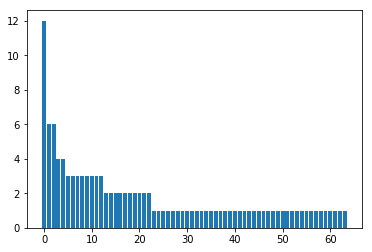

In [90]:
import numpy as np
import matplotlib.pyplot as plt
vect = CountVectorizer().fit(docs)
count = vect.transform(docs).toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]
feature_name = np.array(vect.get_feature_names())[idx]
plt.bar(range(len(count)), count)
plt.show()

In [91]:
pprint(list(zip(feature_name, count))[:10])

[('단어', 12),
 ('문서', 6),
 ('벡터', 6),
 ('생성', 4),
 ('빈도수', 4),
 ('텍스트', 3),
 ('출현', 3),
 ('바이그램', 3),
 ('다음', 3),
 ('하나', 3)]
